<a href="https://colab.research.google.com/github/tejaNRI-Degree/Python-Mini-Project/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [ ]:
# Introduction to ML
# used Library - random,numpy,pandas,

In [ ]:
# Terms in machine learning
# 1.collection: Data used for training,validating and testing the machine learning model
# 2.Feature(X): Independent variable or input variable - used to predict the target variable
# 3.Target(Y): Dependent variable -output- we want to predict -
#Example: predicting Number of bed rooms
# 4.Training Data: subset of dataset used to train the model
# 5.Testing Data:subset of dataset used to validate the trained model
# 6.Model: Mathematical representation of relationship between feature and target
# 7.Supervised learning: Training the data based on labled data/ model learns from knows/ labelled data
# 8.Regression: Method to predict continuous values from a model- supervised learning
# 9.Overfitting : when a model learns from training data to well , includes noise- performs poorly new data
# 10.Underfitting : model is too simpler and does not capture patterns in data

# Categories in machine learning:
#1.supervised learning:
#model learns from labeled data- i/o pairs
#Example: linear regression, Decision trees, Random forest,svm
#Best use case so far: House price prediction based on previous/historical data
#2.unsupervised learning:
# model find new patterns in unlabelled data without predefined data/ labels
#Example: clustering (k means),PCA
#use case: customer segmentation in marketing
#3.Reinforcement learning:
#model learns by interacting with environment and receiving the rewards or penalties
#Example: Deep Learning,AlphaGo,..
#Best use case : self car driving vehicles,self learning AI bots,SLAM

In [ ]:
#Example : predicting the House price - Random dataset - generated
#steps:
#1.Generate a random dataset
#2.Train a ml model - linear regression
#3.Evaluate the model
#4.Make prediction

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#step 1: Generate a random dataset
np.random.seed(42) # used to set same sequence of values for the random package
numsamples = 100

#create numSamples number of samples from (800,5000)
size= np.random.randint(800,5000,numsamples)
bedrooms = np.random.randint(1,6, numsamples)
washrooms= np.random.randint(1,8, numsamples)
localityscore = np.random.randint(1,10, numsamples)

#Genrate House prices with randomness
housePrice = (size*3000) + (bedrooms*50000) + (washrooms* 30000) + (localityscore*70000) + np.random.randint(-50000,50000, numsamples)

#create a Dataframe
df = pd.DataFrame(
      {
         'size':size,
         'Bedrooms': bedrooms,
         'washrooms': washrooms,
         'LocalityScore': localityscore,
         'price': housePrice
      }
)

In [ ]:
df

,size,Bedrooms,washrooms,LocalityScore,price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [ ]:
# Step 2 : Train a ML model - linear regression

# Package (installation) requirements:
# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=df[['size','Bedrooms','washrooms','LocalityScore']]
Y=df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,
random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Step 3 : Evaluate the Model
# Package Requirements
# sklearn.metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error :   {RMSE}')

Mean Absolute Error : 25385.345481365337
Mean Squared Error : 796791448.4323988
Root Mean Squared Error :   28227.494547557686


In [ ]:
# Step 4 : Make prediction
newHouse = np.array([[4000,4,6,10]])
predictedPrice = model.predict(newHouse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f'The predicted prize of new house is {predictedPrice[0]}')

The predicted prize of new house is 13069094.887436867


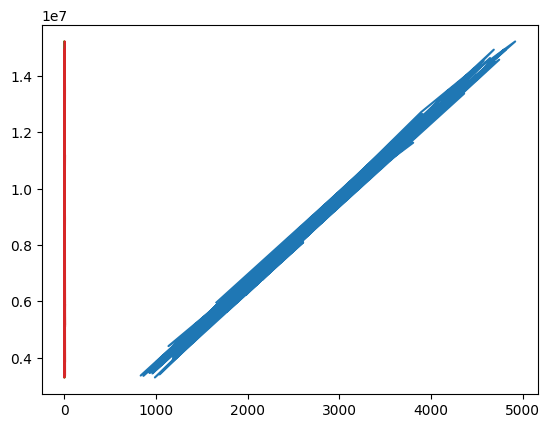

In [ ]:
plt.plot(X,Y)

<ipython-input-74-af4642368861>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


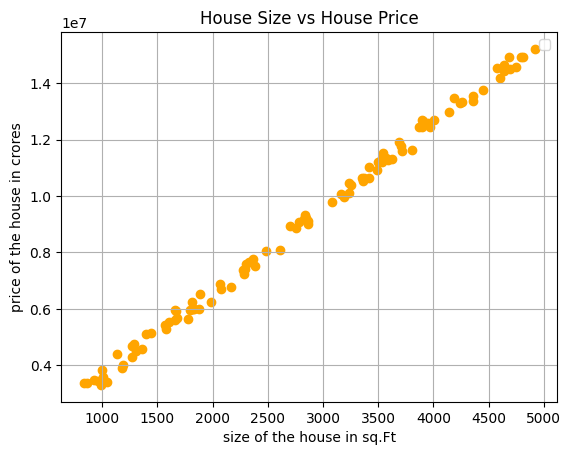

In [ ]:
plt.scatter(df['size'],df['price'],color= 'orange')
plt.xlabel('size of the house in sq.Ft')
plt.ylabel('price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()

In [ ]:
XSorted = np.sort(X, axis=0)
yPred = model.predict(XSorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-86-f100ba6a69e1>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


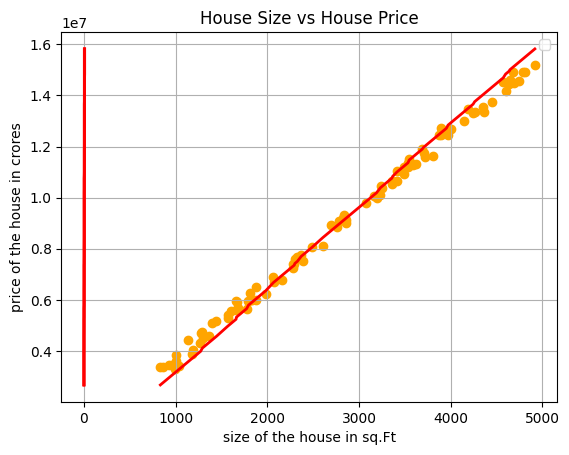

In [ ]:
plt.scatter(df['size'],df['price'],color= 'orange')
plt.plot(XSorted,yPred,color='red',linewidth = 2)
plt.xlabel('size of the house in sq.Ft')
plt.ylabel('price of the house in crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()